<span style='color:Blue ;
             font-size:30px;'>
    Computational Intelligence assignment №1.  </span><br>
<span style='color:Red ;
             font-size:15px;'>
    Student : Amir Zakirov.  </span><br>

In [2]:
import numpy as np
import numpy.linalg as LA
from random import uniform
import matplotlib.pyplot as plt
from scipy.linalg import null_space
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")
N=100
def_array = np.linspace(-10,10,N)

## Task 1

#### Task 1.1:

In [2]:
class plane_from_null_space:
    def __init__(self,v,w,p):
        self.v = v
        self.w = w
        self.p = p
        #Null space and basis:
        self.null_s = self.null_space()
        #Cartesian coordinates:
        self.z = self.cartesian()

    def null_space(self):
        "Obtaining null space"
        return null_space(np.vstack([self.v, self.w]))

    def cartesian(self):
        "Calculation x,y,z coordinates of plane"
        x,y = np.meshgrid(def_array.copy(),def_array.copy())
        A,B,C = self.null_s
        if np.abs(C)>=1e-10:
            z = ( A * (x - self.p[0,0]) + B * (y-self.p[0,1])) \
                * (-1) / C  + self.p[0,2]
        else:
            z,_ = np.meshgrid(np.linspace(self.p[0,2],self.p[0,2],N),np.linspace(self.p[0,2],self.p[0,2],N))
        return z

In [3]:
def check_intersection(set_1,set_2):
    """
    Checking the intersection of two planes based on normal vectors:
    set_1 = [v1 w1 p1]
    set_2 = [v2 w2 p2]
    """
    #Calculation of normal vectors:
    n1 = np.cross(v1,w1)/ np.linalg.norm(np.cross(v1,w1))
    n2 = np.cross(v2,w2)/ np.linalg.norm(np.cross(v2,w2))
    #Calculation of angle between normal vectors:
    #alpha is a sin between normal vectors
    alpha = np.linalg.norm(np.cross(n1,n2))/np.linalg.norm(n1)/np.linalg.norm(n2)
    if alpha!=0:
        print("Planes have an intersection\nAngle between planes is equal to ",np.arcsin(alpha))
    elif alpha == 0 and p1.all()!=p2.all():
        print("Planes are parallel to each other")
    elif alpha == 0 and p1.all()==p2.all():
        print("Planes are the same")

In [4]:
def plotter(planes):
    "3D plot of given planes(task 1.1)"
    # setup plot
    ax = plt.subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10, azim=45)
    x,y = np.meshgrid(def_array.copy(),def_array.copy())
    for plane in planes:
        ax.plot_surface(x, y, plane)

def plotter_two(planes):
    "3D plot of given planes in different figures (task1.2)"
    # setup plot
    fig = plt.figure()
    i=1
    for plane in planes:
        ax = fig.add_subplot(1,2,i,projection='3d')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.view_init(elev=10, azim=45)
        x,y = np.meshgrid(def_array.copy(),def_array.copy())
        ax.plot_surface(x, y, plane)
        i+=1
    return ax

Planes have an intersection
Angle between planes is equal to  0.8456403874099204


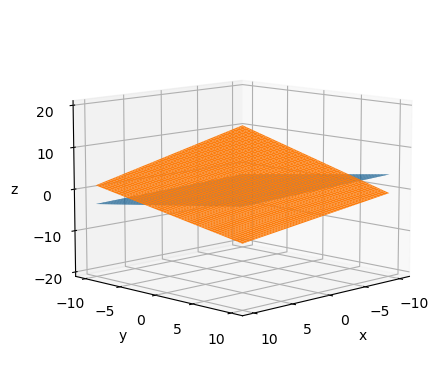

In [5]:
"Case 1 (Random planes):"
def random_vector():
    return np.array([[uniform(-1,1),uniform(-1,1),uniform(-1,1)]])
#Initial arrays:
v1 = random_vector()
w1 = random_vector()
p1 = np.array([[0,0,0]])
v2 = random_vector()
w2 = random_vector()
p2 = np.array([[0,0,0]])
Plane_1 = plane_from_null_space(v1,w1,p1)
Plane_2 = plane_from_null_space(v2,w2,p2)

#Check intersection:
check_intersection([v1,w1,p1],[v2,w2,p2])

#Plot result:
plotter([Plane_1.z,Plane_2.z])

Planes have an intersection
Angle between planes is equal to  1.2309594173407756


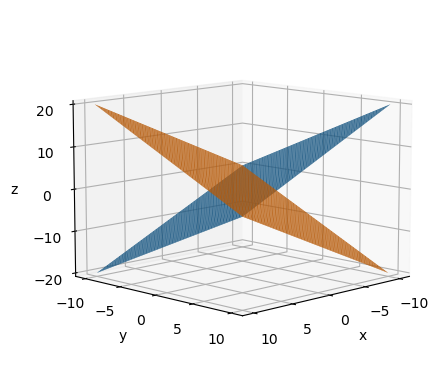

In [6]:
"Case 2 (Diagonal section of cube):"
#Initial arrays:
v1 = np.array([[1,1,0]])
w1 = np.array([[0,1,1]])
p1 = np.array([[0,0,0]])
v2 = np.array([[1,1,0]])
w2 = np.array([[1,0,1]])
p2 = np.array([[0,0,0]])

Plane_1 = plane_from_null_space(v1,w1,p1)
Plane_2 = plane_from_null_space(v2,w2,p2)

#Check intersection:
check_intersection([v1,w1,p1],[v2,w2,p2])

#Plot result:
plotter([Plane_1.z,Plane_2.z])

Planes are parallel to each other


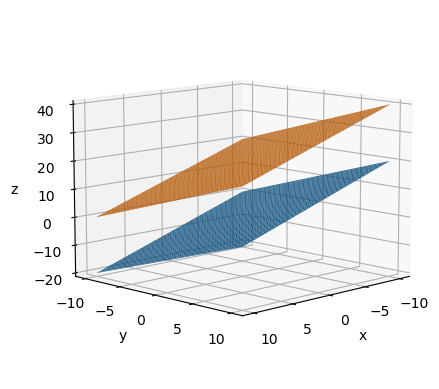

In [7]:
"Case 3(Parallel planes):"
#Initial arrays:
v1 = np.array([[0,1,1]])
w1 = np.array([[1,1,0]])
p1 = np.array([[0,0,0]])
v2 = np.array([[0,2,2]])
w2 = np.array([[2,2,0]])
p2 = np.array([[20,20,20]])

Plane_1 = plane_from_null_space(v1,w1,p1)
Plane_2 = plane_from_null_space(v2,w2,p2)

#Check intersection:
check_intersection([v1,w1,p1],[v2,w2,p2])

#Plot result:
plotter([Plane_1.z,Plane_2.z])

#### Task 1.2:


In [4]:
class plane_from_normal_vector:
    def __init__(self,v,w,p):
        self.v = v
        self.w = w
        self.p = p
        #normal vector:
        self.n = self.norm_vector()
        #Cartesian coordinates:
        self.z = self.cartesian()

    def norm_vector(self):
        "Obtaining normalized by one normal vector"
        return np.cross(self.v,self.w)/ np.linalg.norm(np.cross(self.v,self.w))

    def cartesian(self):
        "Calculation x,y,z coordinates of plane"
        x,y = np.meshgrid(def_array.copy(),def_array.copy())
        if self.n[0,2]!=0:
            z = ( self.n[0,0] * (x - self.p[0,0]) + self.n[0,1] * (y-self.p[0,1])) \
                * (-1) / self.n[0,2]  + self.p[0,2]
        else:
            z,_ = np.meshgrid(np.linspace(self.p[0,2],self.p[0,2],N),np.linspace(self.p[0,2],self.p[0,2],N))
        return z

    def print_eq(self):
        "Print equation in form n*(r-r0)=0"
        #r0 == p0
        print(
            "Plane equation:\n"
            "<%.1f, %.1f, %.1f> * (<x, y, z> - <%.1f, %.1f, %.1f>) = <0, 0, 0>"
            %(self.n[0,0],self.n[0,1],self.n[0,2],self.p[0,0], self.p[0,1], self.p[0,2])
        )
        return

Case 1:

Plane equation:
<-1.0, 0.2, -0.1> * (<x, y, z> - <0.0, 1.0, 0.0>) = <0, 0, 0>


<Axes3DSubplot:xlabel='x', ylabel='y'>

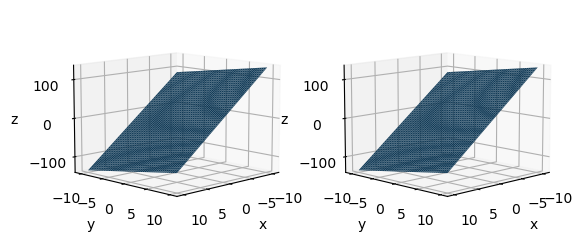

In [9]:
#Initial vectors:
v = np.array([[1,7,4]])
w = np.array([[2,8,-5]])
p = np.array([[0,1,0]])

#Obtaining plane parameters using normal vectors:
Plane_from_normal_vector = plane_from_normal_vector(v,w,p)
#Print the plane equation:
Plane_from_normal_vector.print_eq()

#Obtaining plane parameters using null space:
Plane_from_null_space = plane_from_null_space(v,w,p)

#Plot the results:
plotter_two([Plane_from_normal_vector.z,Plane_from_null_space.z])


Case 2:

Plane equation:
<0.7, -0.7, 0.0> * (<x, y, z> - <-1.0, 0.0, 0.0>) = <0, 0, 0>


<Axes3DSubplot:xlabel='x', ylabel='y'>

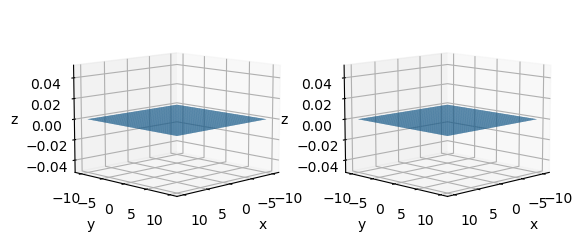

In [10]:
#Initial vectors:
v = np.array([[-2,-2,1]])
w = np.array([[5,5,-5]])
p = np.array([[-1,0,0]])

#Obtaining plane parameters using normal vectors:
Plane_from_normal_vector = plane_from_normal_vector(v,w,p)
#Print the plane equation:
Plane_from_normal_vector.print_eq()

#Obtaining plane parameters using null space:
Plane_from_null_space = plane_from_null_space(v,w,p)

#Plot the results:
plotter_two([Plane_from_normal_vector.z,Plane_from_null_space.z])

#### Task 1.3

In [7]:
#Initial vectors:
v = np.array([[-2,3,3]])
w = np.array([[1,1,-5]])
p = np.array([[2,2,2]])
g = np.array([[-10,-3,5]])

#Obtaining plane parameters using normal vectors:
Plane_from_normal_vector = plane_from_normal_vector(v,w,p)
#Calculating the projection:
print("Projection is equal to: ",np.dot(g[0],Plane_from_normal_vector.n[0]))
#Normal vector:
print("Normal vector: <%.1f, %.1f, %.1f>" % (Plane_from_normal_vector.n[0,0], Plane_from_normal_vector.n[0,1], Plane_from_normal_vector.n[0,2]))

Projection is equal to:  8.822082845260704
Normal vector: <-0.9, -0.4, -0.3>


#### Task 1.4

In [12]:
#Initial vectors:
v = np.array([[1,0,0]])
w = np.array([[4,2,-1]])
p = np.array([[-5,11,0.5]])
g = np.array([[-10,-3,5]])

#Obtaining plane parameters using normal vectors:
Plane_from_normal_vector = plane_from_normal_vector(v,w,p)

#Vector PG:
PG = np.array([[g[0,0]-p[0,0],g[0,1]-p[0,1],g[0,2]-p[0,2]]])
#Projection of vector PG on normal vector is equal to distance from G to plane
# or half of a distance between G and G*
alpha = np.dot(PG[0],Plane_from_normal_vector.n[0])
#G* vector:
g_sym = g - 2 * alpha * Plane_from_normal_vector.n
print("G : <%.1f, %.1f, %.1f>" % (g[0,0],g[0,1],g[0,2]))
print("G* : <%.1f, %.1f, %.1f>" % (g_sym[0,0],g_sym[0,1],g_sym[0,2]))

G : <-10.0, -3.0, 5.0>
G* : <-10.0, -1.0, 9.0>


Plot result:

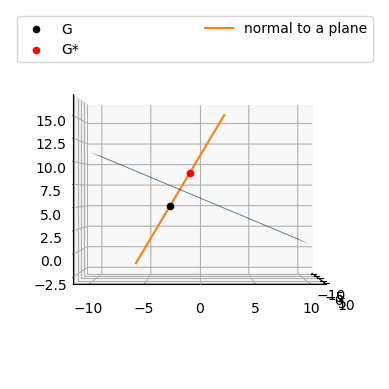

In [13]:
ax = plt.subplot(projection='3d')
ax.view_init(elev=0, azim=0)

#Points G and G*:
ax.scatter(g[0,0], g[0,1], g[0,2], color='k', label = 'G')
ax.scatter(g_sym[0,0], g_sym[0,1], g_sym[0,2], color='r', label = 'G*')

#Plane:
x,y = np.meshgrid(def_array.copy(),def_array.copy())
ax.plot_surface(x, y, Plane_from_normal_vector.z)

#Normal vector through projection of G to a plane:
intersection = g - alpha * Plane_from_normal_vector.n
t = def_array.copy()
ax.plot(
    intersection[0,0] + Plane_from_normal_vector.n[0,0]*t
    , intersection[0,1] + Plane_from_normal_vector.n[0,1]*t
    , intersection[0,2] + Plane_from_normal_vector.n[0,2]*t
    , label = 'normal to a plane'
)
ax.legend(ncol=2, mode="expand")
plt.show()